In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from astropy.table import Table
from scipy.spatial import distance
from scipy import spatial
from scipy.spatial import KDTree
import time

In [3]:

T = Table.read('NGC2264.vot',format='votable')
print(T.colnames)

RA2 = T['RA_ICRS']
DEC2 = T['DE_ICRS']
print(len(RA2))

['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']
31999


In [137]:
#t = Table.read('CHAM_data.vot',format='votable')
t = Table.read('cloud_data.vot',format='votable')
print(t.colnames)

RA = t['RA_ICRS']
DEC = t['DE_ICRS']
ID = t['Source']
print(len(RA))

WARNING

['_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx', 'pmRA', 'pmDE', 'RADEcor', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var']
6860


: W51: cloud_data.vot:128:122: W51: Value '4631296053121937280' is out of range for a 16-bit integer field [astropy.io.votable.converters]


29


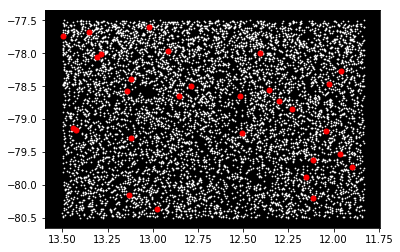

-80.3580042896


In [6]:
from matplotlib.pyplot import *
plx = t['Plx']
Gmag = t['__Gmag_']
stars = []
yes = 0
for i in range(len(plx)):
    if(str(plx[i]) != '--'):
        yes = yes + 1
        stars.append([float(plx[i]),RA[i],DEC[i],Gmag[i]])
        
print(len(stars))
fig, ax = plt.subplots()
ax.set_facecolor('black')
stars = np.array(stars)
plt.gca().invert_xaxis()
plt.scatter(RA,DEC,s=0.5,c='w')
plt.scatter(stars[:,1],stars[:,2],s=25.0,c='r')
plt.show()
# print(np.mean(stars[:,3]),np.mean(stars[:,0]))
# print(np.mean(Gmag))

print(stars[0,2])

In [7]:
#print(stars[0:len(stars)])
twoStar = []
for i in range(len(stars[:,0])):
    if(stars[i,1] > 13.00 and stars[i,1] < 13.25 and stars[i,2] > -79.0 and stars[i,2] < -78.1):
        twoStar.append([stars[i,1],stars[i,2],stars[i,0],stars[i,3]])
    if(stars[i,1] > 12.4 and stars[i,1] < 12.7 and stars[i,2] > -79.0 and stars[i,2] < -78.5):
        twoStar.append([stars[i,1],stars[i,2],stars[i,0],stars[i,3]])
print(twoStar)
twoStar = np.array(twoStar)
distances = 1000/twoStar[:,2]
print(distances)
# print(twoStar[:,3])
error = np.sqrt((1000/stars[2]**2)**2*0.7**2)
print(error)
1/(twoStar[2]/1000.0)

[[12.515995311999999, -78.645331960099995, 0.9100000262260437, 11.11299991607666], [13.1453379111, -78.571666362000002, 1.4500000476837158, 12.241999626159668], [13.1191423191, -78.395404922400004, 3.559999942779541, 11.72599983215332]]
[ 1098.90106723   689.65514973   280.89888092]
[  4.20647822e+02   4.77116989e+00   1.08845596e-01   8.23090886e+00]


array([  76.22449514,  -12.75584967,  280.89888092,   85.28057431])

18.4563319971
2.29593445887


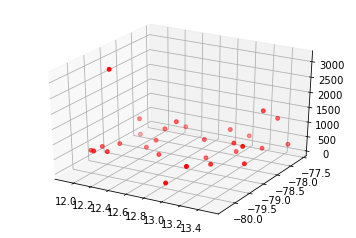

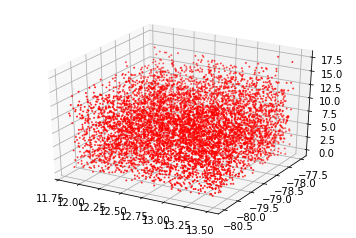

6.39659 17.402


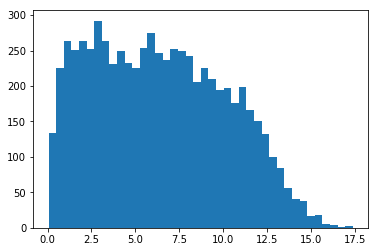

In [8]:
from mpl_toolkits.mplot3d import Axes3D

print(np.mean(Gmag))
distPC = 1000/stars[:,0]
AbsG = 20

allData = np.array([stars[:,1],stars[:,2],distPC])
allData = np.transpose(allData)
AbsGmag = (stars[:,3] + 5 - 5*np.log10(distPC))
print(np.mean(AbsGmag))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(allData[:,0],allData[:,1],allData[:,2],s=15.0,c='r')
plt.show()

roughDist = 10**((AbsG - Gmag - 5)/-5)
data3D = np.array([RA,DEC,roughDist])
data3D = np.transpose(data3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3D[:,0],data3D[:,1],data3D[:,2],s=1.0,c='r')
plt.show()

print(np.mean(roughDist),np.max(roughDist))
plt.hist(data3D[:,2],40)
plt.show()

[   0  169  368  126  183  420  413   14 1287  610 1286  144  531 1303 1307
  740  130  390  556  588 1289  109  792  735  128  543  530  360 1401  525
  258  142  791  587  798  425 1402 1345 1370  114 1417  148  763  401  928
 1270  582 1331 1342  245  462   10 1338  262 1285  143 1330  707  982  551
  593 1434  972 1344   49  966 1311 1109   47 2154  753 2150  369 1447  761
  923 2163  242 2151   24 1290 1389 2196  528  322  173 1120 1476 1055  943
 1380  549 2157 1407 1074  586  733 1300  727   43]
6860


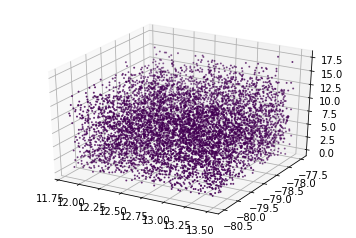

2.22044604925e-16


In [7]:
from mpl_toolkits.mplot3d import Axes3D

tree = KDTree(data3D,2)
dis,ind = tree.query(data3D,k=100)
print(ind[0])

distance3D = []
for d in range(len(dis)):
    distance3D.append(dis[i,99])
print(len(distance3D))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3D[:,0],data3D[:,1],data3D[:,2],s=1.0,c=distance3D)
#plt.colorbar()
plt.show()
print(np.std(distance3D))

In [225]:
from matplotlib.pyplot import *
Start = time.time()

N = 200
xgrid = np.linspace(np.min(data3D[:,0]),np.max(data3D[:,0]),N)
ygrid = np.linspace(np.min(data3D[:,1]),np.max(data3D[:,1]),N)
Z = np.linspace(np.min(data3D[:,2]),np.max(data3D[:,2]),N)
X, Y = np.meshgrid(xgrid,ygrid)

X = np.array(X)
Y = np.array(Y)

XYZcoords = []
for i in range(len(Z)):
    for j in range(len(xgrid))
    XYZcoords.append([X,Y,Z[i]])
    
XYZcoords = np.array(XYZcoords)
XYZcoords = np.transpose(XYZcoords)
print(XYZcoords[0])

# time1 = time.time()

# XY = [X,Y]
# XY = np.transpose(XY)
# XYcoords = XY[0]
# for j in range(1,len(XY)):
#     XYcoords = np.vstack((XYcoords,XY[j]))


# start1 = time.time()

# end1 = time.time()
# start2 = time.time()
# tree = KDTree(data,50)
# dist,ind = tree.query(XYcoords,k=5)
# end2 = time.time()

# distArray = []
# for d in range(len(dist)):
#     distArray.append(dist[d][4])
# # print('LENGTH OF DISTARRAY:',len(distArray))
# # print('\nLength of distArray:',len(distArray))    
# distArray = np.array(distArray)
# End = time.time()

# print('\n\nRunTime:',End-Start,'s')
# print('\nRuntime to build XYcoords:',end1-start1,'s')
# print('\nRuntime to build KDTree:',end2-start2,'s')


# distArray = np.reshape(distArray,(-1,N))
# distArray = np.transpose(distArray)

# #plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
# plt.xlim(0,N)
# plt.ylim(0,N)
# #plt.show()

# # fig, ax = plt.subplots()
# # ax.set_facecolor('black')
# plt.contour(distArray,5,cmap='hot')

# #plt.scatter(data[:,0],data[:,1],s=3.0,c='y')
# #plt.scatter(test_array[:,0]*N,test_array[:,1]*N,marker='s',c=distArray,cmap="gray")
# plt.xlim(0,N)
# plt.ylim(0,N)
# plt.title(str(N)+'x'+str(N)+' Contour Plot')
# plt.gca().invert_xaxis()
# #plt.gca().invert_yaxis()
# plt.show()

# plt.scatter(data[:,0],data[:,1],c='w',s=0.7)
# plt.xlim(np.min(data[:,0]),np.max(data[:,0]))
# plt.ylim(np.min(data[:,1]),np.max(data[:,1]))
# plt.gca().invert_xaxis()
# #plt.gca().invert_yaxis()
# plt.show()

[ array([[ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896],
       [ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896],
       [ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896],
       ..., 
       [ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896],
       [ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896],
       [ 11.8300571 ,  11.83844872,  11.84684033, ...,  13.48320573,
         13.49159735,  13.49998896]])
 array([[-80.49882932, -80.49882932, -80.49882932, ..., -80.49882932,
        -80.49882932, -80.49882932],
       [-80.48376097, -80.48376097, -80.48376097, ..., -80.48376097,
        -80.48376097, -80.48376097],
       [-80.46869261, -80.46869261, -80.46869261, ..., -80.46869261,
        -80.46869261, -80.46869261],
       ..., 
       [-77.5303

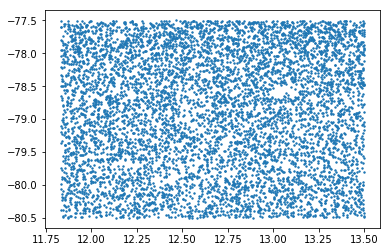

In [9]:
from scipy import spatial
from scipy.spatial import KDTree
import numpy as np
import copy
import time

plt.scatter(RA,DEC,s=2.0)
plt.show()

Input Data for Distance Map/Contour Plot creation

In [14]:
value = np.max(RA)-np.max(XYcoords[:,0])
print(value)

0.0


In [10]:
data = np.array([RA,DEC])
redData = []
for i in range(len(Gmag)):
    if(Gmag[i] <= 17.0):
        redData.append([RA[i],DEC[i]])
#data = np.array([RA2,DEC2])
data = np.array(data)
redData = np.array(redData)
print((data[0]))
data = np.transpose(data)
print(len(data))
#print(data[30000])
print(redData[0,1])

[ 13.40479395  13.36357079  13.49955861 ...,  13.27403643  13.27086827
  13.20184227]
6860
-80.4873302854


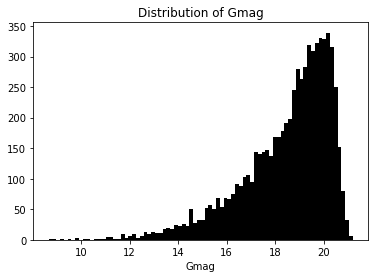

18.9449996948 18.4563319971


In [10]:
def KDneighbor(array):
    tree = KDTree(array,100000)
    dist, ind = tree.query(array, k=7)
    return(dist[5])

plt.hist(Gmag,80,color='black')
plt.title('Distribution of Gmag')
plt.xlabel('Gmag')
plt.show()
print(np.median(Gmag),np.mean(Gmag))

In [28]:
print(250.0 - np.max(ygrid))
print('\n',250.0 - np.max(xgrid))

print(Y)

327.500227199

 236.500011037
[[-80.49882932 -80.49882932 -80.49882932 ..., -80.49882932 -80.49882932
  -80.49882932]
 [-80.48678674 -80.48678674 -80.48678674 ..., -80.48678674 -80.48678674
  -80.48678674]
 [-80.47474416 -80.47474416 -80.47474416 ..., -80.47474416 -80.47474416
  -80.47474416]
 ..., 
 [-77.52431236 -77.52431236 -77.52431236 ..., -77.52431236 -77.52431236
  -77.52431236]
 [-77.51226978 -77.51226978 -77.51226978 ..., -77.51226978 -77.51226978
  -77.51226978]
 [-77.5002272  -77.5002272  -77.5002272  ..., -77.5002272  -77.5002272
  -77.5002272 ]]




RunTime: 23.227945566177368 s

Runtime to build XYcoords: 3.695487976074219e-05 s

Runtime to build KDTree: 23.176249027252197 s


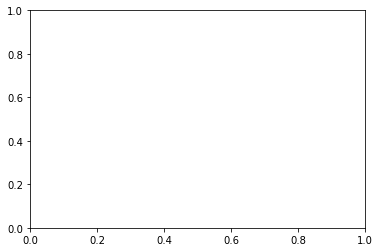

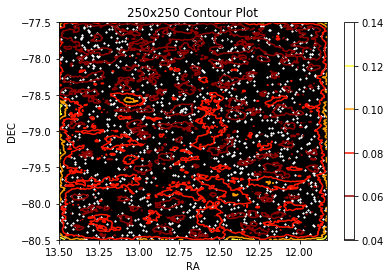

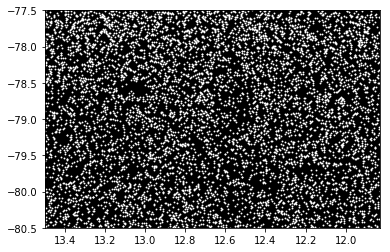

In [11]:
from matplotlib.pyplot import *
Start = time.time()

N = 250
xgrid = np.linspace(np.min(data[:,0]),np.max(data[:,0]),N)
ygrid = np.linspace(np.min(data[:,1]),np.max(data[:,1]),N)
X, Y = np.meshgrid(xgrid,ygrid)

X = np.array(X)
Y = np.array(Y)

time1 = time.time()

XY = [X,Y]
XY = np.transpose(XY)
XYcoords = XY[0]
for j in range(1,len(XY)):
    XYcoords = np.vstack((XYcoords,XY[j]))


start1 = time.time()

end1 = time.time()
start2 = time.time()
tree = KDTree(data,50)
dist,ind = tree.query(XYcoords,k=20)
end2 = time.time()

distArray = []
for d in range(len(dist)):
    distArray.append(dist[d][19])
# print('LENGTH OF DISTARRAY:',len(distArray))
# print('\nLength of distArray:',len(distArray))    
distArray = np.array(distArray)
End = time.time()

print('\n\nRunTime:',End-Start,'s')
print('\nRuntime to build XYcoords:',end1-start1,'s')
print('\nRuntime to build KDTree:',end2-start2,'s')


distArray = np.reshape(distArray,(-1,N))
distArray = np.transpose(distArray)



#plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
plt.xlim(0,1)
plt.ylim(0,1)
#plt.show()

# fig, ax = plt.subplots()
# ax.set_facecolor('black')

fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.contour(X,Y,distArray,5,cmap='hot')
plt.colorbar()
#plt.scatter(data[:,0],data[:,1],s=3.0,c='y')
#plt.scatter(test_array[:,0]*N,test_array[:,1]*N,marker='s',c=distArray,cmap="gray")
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.title(str(N)+'x'+str(N)+' Contour Plot')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_xaxis()
plt.scatter(redData[:,0],redData[:,1],s=2.0,c='w',marker='*')
#plt.gca().invert_yaxis()
plt.show()

fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.scatter(data[:,0],data[:,1],c='w',s=0.7)
plt.xlim(np.min(data[:,0]),np.max(data[:,0]))
plt.ylim(np.min(data[:,1]),np.max(data[:,1]))
plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.show()

Contour plot created using all stars in the region. The stars plotted on top of the contour plot have Gmag <= 17
5
Total Stars within contour:  709


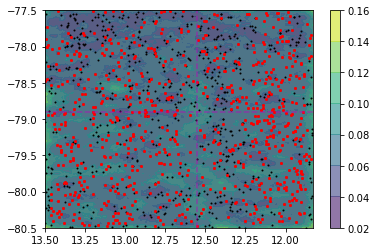

Runtime:  0.5086209774017334


In [99]:
import matplotlib.path as mpltPath


    
## SPECIFY RA AND DEC RANGES
RArange = 12.55
DECrange = -78.9
Range = np.array([RArange,DECrange])


print('Contour plot created using all stars in the region. The stars plotted on top of the contour plot have Gmag <= 17')
start_time = time.time()
fig, ax = plt.subplots()
ax.set_facecolor('gray')

cs = plt.contourf(X,Y,distArray,5,alpha=0.6)
plt.colorbar()
plt.axvline(x=RArange,linestyle='--',color='m',alpha=0.5)
plt.axhline(y=DECrange,linestyle='--',color='m',alpha=0.5)
#plt.scatter(data[:,0],data[:,1],c='b',marker='*',s=2.5)
plt.xlim(np.min(X),np.max(X))
plt.ylim(np.min(Y),np.max(Y))
plt.gca().invert_xaxis()

# p = cs.collections[3].get_paths()[3]
# print('LENGTH of P:',len(p))
# v = p.vertices
# x = v[:,0]
# y = v[:,1]
# plt.scatter(x,y,c='b',s=10.0)

insideStars = []
starCount = 0
inside = []
for i in range(len(cs.collections[2].get_paths())):
    p = cs.collections[2].get_paths()[i]
    v = p.vertices
    x = v[:,0]
    y = v[:,1]
    
    if(RArange >= np.min(x) and RArange <= np.max(x) and DECrange >= np.min(y) and DECrange <= np.max(y)):
    
    #print(v)
        polygon = v
        path = mpltPath.Path(polygon)
        inside = path.contains_points(redData)
        coords = np.array([x,y])    
#     if(len(inside) > 0):
for i in range(len(inside)):
    if(str(inside[i]) == 'True'):
        starCount = starCount + 1
        insideStars.append(redData[i])
insideStars = np.array(insideStars)

print(len(v))
#plt.scatter(x,y,c='b',s=1.0)
plt.scatter(redData[:,0],redData[:,1],s=1.0,c='k',alpha=1.0)
if(len(insideStars) > 0):
    plt.scatter(insideStars[:,0],insideStars[:,1],s=4.0,c='r')
    #plt.scatter(coords[:,0],coords[:,1],c='m',s=10)
    print('Total Stars within contour: ',starCount)
else:
    print('No stars located within selected contour')
plt.show()

# for i in range(len(redData)):
#     if(redData[i,0] >= np.min(x) and redData[i,0] <= np.max(x) and redData[i,1] >= np.min(y) and redData[i,1] <= np.max(y)):
#         print('success')
end_time = time.time()
print('Runtime: ',end_time - start_time)

# Define Function that Creates Contour Map and Select Stars Within individual Contour Lines

Function identifies what region the user wants to focus on. 
All Stars within selected contour will appear red, while all stars outside contour will appear black.
Function will also list out Star ID and Magnitude

In [143]:
from matplotlib.patches import Circle, Wedge, Polygon
def StarSelection(distArray,RA,DEC,L):
    
    ## SPECIFY RA AND DEC RANGES
    RArange = RA
    DECrange = DEC
    Range = np.array([RArange,DECrange])


    #print('Contour plot created using all stars in the region. The stars plotted on top of the contour plot have Gmag <= 17')
    start_time = time.time()
    fig, ax = plt.subplots()
    ax.set_facecolor('gray')

    cs = plt.contour(X,Y,distArray,5,alpha=0.6)
    plt.colorbar()
    plt.axvline(x=RArange,linestyle='--',color='y',alpha=0.4)
    plt.axhline(y=DECrange,linestyle='--',color='y',alpha=0.4)
    #plt.scatter(data[:,0],data[:,1],c='b',marker='*',s=2.5)
    plt.xlim(np.min(X),np.max(X))
    plt.ylim(np.min(Y),np.max(Y))
    plt.gca().invert_xaxis()

    # p = cs.collections[3].get_paths()[3]
    # print('LENGTH of P:',len(p))
    # v = p.vertices
    # x = v[:,0]
    # y = v[:,1]
    # plt.scatter(x,y,c='b',s=10.0)

    insideStars = []
    starCount = 0
    inside = []
    psize = 0
    for i in range(len(cs.collections[L].get_paths())):
        p = cs.collections[L].get_paths()[i]
        v = p.vertices
        x = v[:,0]
        y = v[:,1]

        if(RArange >= np.min(x) and RArange <= np.max(x) and DECrange >= np.min(y) and DECrange <= np.max(y)):

        #print(v)
            psize = len(p)
            polygon = v
            #path = Polygon(v,closed=True)
            path = mpltPath.Path(polygon,closed=True)
            inside = path.contains_points(redData)
            coords = np.array([x,y])    
    #     if(len(inside) > 0):
    for i in range(len(inside)):
        if(str(inside[i]) == 'True'):
            starCount = starCount + 1
            insideStars.append(redData[i])
    insideStars = np.array(insideStars)

    #plt.scatter(x,y,c='b',s=1.0)
    plt.scatter(redData[:,0],redData[:,1],s=1.0,c='k',alpha=0.8)
    if(len(insideStars) > 0):
        plt.scatter(insideStars[:,0],insideStars[:,1],s=4.0,c='r')
        #plt.scatter(coords[:,0],coords[:,1],c='m',s=10)
        print('Total Stars within contour: ',starCount,'\n\n')
#         print('Star ID              Gmag\n')
#         for j in range(len(Gmag)):
#             print(ID[j],'              ',Gmag[j])
        plt.show()
        print(psize)
    else:
        print('No stars located within selected contour')
        plt.show()
    
    # for i in range(len(redData)):
    #     if(redData[i,0] >= np.min(x) and redData[i,0] <= np.max(x) and redData[i,1] >= np.min(y) and redData[i,1] <= np.max(y)):
    #         print('success')
    end_time = time.time()
    print('Runtime: ',end_time - start_time,'\n\n')

Total Stars within contour:  10 




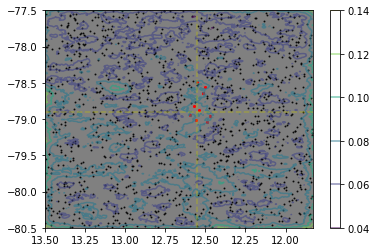

401
Runtime:  0.4694352149963379 


Total Stars within contour:  9 




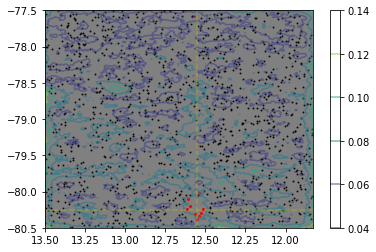

171
Runtime:  0.4639298915863037 


Total Stars within contour:  8 




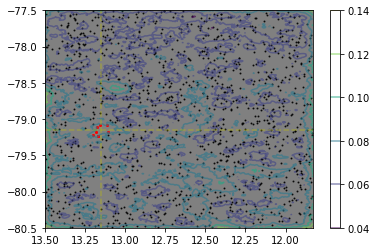

171
Runtime:  0.536142110824585 


Total Stars within contour:  3 




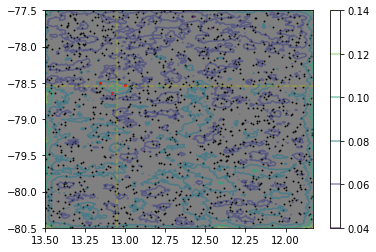

117
Runtime:  0.43466758728027344 




In [145]:
StarSelection(distArray,12.55,-78.9,2)
StarSelection(distArray,12.55,-80.25,2)
StarSelection(distArray,13.15,-79.15,2)
StarSelection(distArray,13.05,-78.55,2)

In [109]:

polygon = Polygon([[0,0],[1,1],[1,0],[2,3],[0,4],[2,1]])
polygon = np.array(polygon)
x = np.array([[0.5,1.5]])
print(x)
path = mpltPath.Path(polygon)
# if(x in polygon):
#     print('yes')
inside2 = path.contains_points(x)
print(inside2)
plt.scatter(polygon[:,0],polygon[:,1],c='r',marker='s',s=5.0)
plt.scatter(x[:,0],x[:,1])
print(x[0])
plt.show()

[[ 0.5  1.5]]


TypeError: float() argument must be a string or a number, not 'Polygon'

In [110]:
from turtle import *
color('red', 'yellow')
begin_fill()
while True:
    forward(200)
    left(170)
    if abs(pos()) < 1:
        break
end_fill()
done()

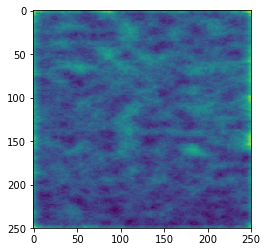

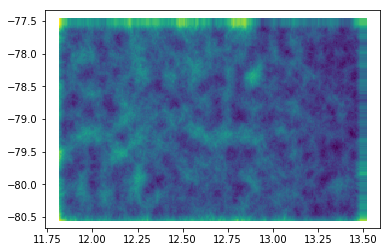

In [108]:
extent = [np.min(X), np.max(X), np.min(Y), np.max(Y)]

plt.imshow(distArray)
plt.show()
plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
plt.show()

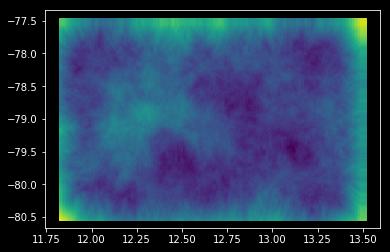

In [251]:
#XYcoords = np.transpose(XYcoords)
#plt.style.use('bright_background')
plt.scatter(XYcoords[:,0],XYcoords[:,1],marker='s',c=distArray)
plt.show()

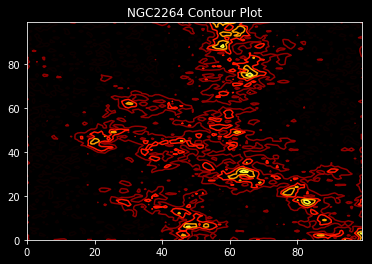

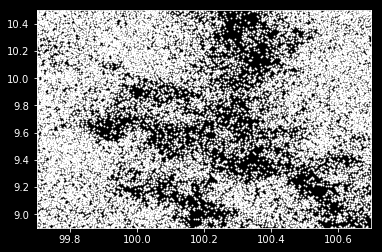

In [49]:
from scipy import ndimage

#distances = copy.copy(distArray)
#distances = np.transpose(distances)
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.contour(distances,5,cmap='hot')
plt.title('NGC2264 Contour Plot')
plt.show()
fig, ax = plt.subplots()
ax.set_facecolor('black')
plt.scatter(RA2,DEC2,s=0.7,c='w')
plt.xlim(np.min(RA2),np.max(RA2))
plt.ylim(np.min(DEC2),np.max(DEC2))
plt.show()

In [131]:
t = time.time()
Z = np.random.rand(30000,2)
V = np.random.rand(62500,2)
tree = KDTree(Z,50)
dist,ind = tree.query(V,k=50)
e = time.time()
print('\nRuntime:',e-t)
#print(dist)


Runtime: 23.19644570350647


20


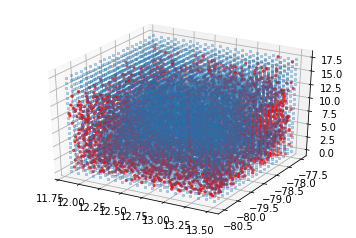

In [97]:
x = np.linspace(np.min(data3D[:,0]),np.max(data3D[:,0]),20)
y = np.linspace(np.min(data3D[:,1]),np.max(data3D[:,1]),20)
z = np.linspace(np.min(data3D[:,2]),np.max(data3D[:,2]),20)

x_,y_,z_ = np.meshgrid(x,y,z)
Xi, Yi = np.meshgrid(x,y)
grid3d = np.array([x_,y_,z_])
grid3d = np.transpose(grid3d)



# coord3d = []
# for i in range(len(z)):
#     for j in range(len(Xi)):
#         coord3d.append([Xi[j],Yi[j],z[i]])
    
coord3d = np.array(coord3d)
coord3d = np.transpose(coord3d)

tree = KDTree(data3D,50)
dis,ind = tree.query(grid3d,k=5)
distance3D = []
for d in range(len(dis)):
    distance3D.append(dis[i,3])

print(len(dis))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_,y_,z_,s=4.0,marker='s',alpha=0.3)
ax.scatter(data3D[:,0],data3D[:,1],data3D[:,2],c='r',s=5.0)
plt.show()



In [72]:
G = np.array([[1,1,1],[2,2,2],[3,3,3]])
tree = KDTree(G,2)
dis,ind = tree.query(G,k=2)
print(dis)

dist3d = np.sqrt((2-2)**2+(1-2)**2+(1-2)**2)
print(dist3d)

print('\n\n\n',G)

[[ 0.          1.73205081]
 [ 0.          1.73205081]
 [ 0.          1.73205081]]
1.41421356237



 [[1 1 1]
 [2 2 2]
 [3 3 3]]


In [53]:
import sys
pip install shapely

SyntaxError: invalid syntax (<ipython-input-53-fd6ea663dac2>, line 2)